In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplsoccer

# Analyzing Football Statistics with Python

## Introduction

Football, also known as soccer in some regions, is one of the most popular sports worldwide, captivating millions of fans with its exhilarating matches and dynamic gameplay. Behind every thrilling match lies a treasure trove of data and statistics that offer insights into team and player performance, strategy effectiveness, and the overall dynamics of the game.

In this Jupyter Notebook, we embark on a journey to explore the fascinating world of football statistics using the power of Python programming language and its data analysis libraries. Through this analysis, we aim to uncover valuable insights, trends, and patterns hidden within football data, providing a deeper understanding of the game we all love.

## Goals of the Analysis

- **Understand Team Performance**: We'll delve into team performance metrics such as goals scored, possession percentage, shots on target, and more to assess the effectiveness of different teams in various competitions.

- **Player Analysis**: By examining player statistics such as goals scored, assists, successful dribbles, and defensive actions, we aim to identify key players and analyze their impact on team performance.

- **Tactical Insights**: Through tactical analysis based on statistical data, we'll explore different playing styles, formations, and strategies employed by teams and assess their effectiveness in different game situations.

- **Predictive Modeling**: Leveraging machine learning algorithms, we'll develop predictive models to forecast match outcomes, player performance, and other relevant metrics, enhancing our ability to make data-driven decisions in the realm of football.

## Data Sources

To conduct our analysis, we'll utilize a diverse range of data sources, including but not limited to:

- **Official Football Databases**: We'll gather data from official football databases such as UEFA, FIFA, Premier League, La Liga, Serie A, Bundesliga, and other reputable sources.

- **Open Data Repositories**: We'll explore open data repositories and APIs that provide access to a wide array of football statistics, match results, player profiles, and more.

- **Third-party Providers**: Additionally, we may leverage data provided by third-party sports analytics platforms, betting websites, and statistical services specializing in football data analysis.

## Tools and Libraries

Our analysis will be powered by a variety of Python libraries tailored for data manipulation, visualization, and statistical analysis. Some of the key libraries we'll use include:

- **Pandas**: For data manipulation and analysis, including data cleaning, filtering, grouping, and aggregation.

- **Matplotlib** and **Seaborn**: For data visualization, enabling us to create insightful plots, charts, and graphs to visualize football statistics.

- **Scikit-learn**: For machine learning tasks such as predictive modeling, clustering, and classification.

- **Jupyter Notebook**: For creating an interactive and reproducible environment that seamlessly integrates code, visualizations, and explanatory text.

## Structure of the Notebook

Our Jupyter Notebook will be structured into logical sections, each focusing on a specific aspect of football statistics analysis. These sections may include:

1. Data Acquisition and Preprocessing: In this section, we'll gather football data from various sources and perform preprocessing steps such as cleaning, formatting, and merging datasets.

2. Exploratory Data Analysis (EDA): Here, we'll conduct exploratory data analysis to gain insights into the distribution, summary statistics, and relationships within the football data.

3. Team Performance Analysis: We'll analyze team performance metrics such as goals scored, possession percentage, passing accuracy, and defensive actions to assess the strengths and weaknesses of different teams.

4. Player Analysis: This section will focus on analyzing individual player statistics, identifying key players, and assessing their contributions to team performance.

5. Tactical Insights: Through tactical analysis, we'll explore different playing styles, formations, and strategies employed by teams and evaluate their effectiveness.

6. Predictive Modeling: Finally, we'll develop predictive models using machine learning algorithms to forecast match outcomes, player performance, and other relevant metrics.

## Conclusion

Through this Jupyter Notebook, we aim to provide a comprehensive analysis of football statistics, offering valuable insights and actionable findings for football enthusiasts, analysts, coaches, and players alike. By leveraging the power of Python and data science techniques, we hope to deepen our understanding of the beautiful game and uncover new avenues for exploration and discovery.

Let's kick off our analysis and dive into the exciting world of football statistics!


Let's start by discussing the data fetching process, we will be using the Football Dataset from Kaggle in this Notebook.
The link to the dataset: <a href="https://www.kaggle.com/datasets/technika148/football-database/data">Football Dataset</a>

This dataset contains football-related data covering the Top5 leagues in Europe from 2014-2020. It is structured like a relational database, which makes it easy to work with, regardless of the problem you want so solve.

I will download the dataset locally in data/raw since the dataset is not updated regularly, for other data sources that are updated regularly we will use a dynamic way to fetch the data.
In this dataset we have seven csv files:
<ul>
    <li>appearances.csv: Every appearance a player has made in one of the Top5 leagues over the specified time window.</li>
    <li>games.csv: All games played in one of the Top5 leagues over the specified time window</li>
    <li>leagues.csv: Top5 leagues</li>
    <li>players.csv: Every player who has played in one of the Top5 leagues over the specified time window</li>
    <li>shots.csv: All shots taken in one of the Top5 leagues over the specified time window</li>
    <li>teams.csv: All teams who played in one of the Top5 leagues over the specified time window</li>
    <li>teamstats.csv: Game statistics by team in one of the Top5 leagues over the specified time window</li>
</ul>

In [38]:
# Create dataframes of each csv file
df_appearance = pd.read_csv('data/raw/appearances.csv')
df_game = pd.read_csv('data/raw/games.csv')
df_shots = pd.read_csv('data/raw/shots.csv')
df_team_stats = pd.read_csv('data/raw/teamstats.csv')

In [6]:
# Let's look at how our data looks like by printing the three first rows of each dataframe
df_appearance.head(3)

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1


In [7]:
df_game.head(3)

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,5.90,1.62,3.6,6.0,1.67,4.0,5.75,1.64,4.07,6.04
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,4.27,1.91,3.5,4.0,2.00,3.5,4.20,1.82,3.88,4.70
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,5.62,1.73,3.5,5.0,1.73,3.9,5.40,1.75,3.76,5.44


In the game dataframe, some columns are not as straightforward as they should be, so let's explain them. Starting from the <b>B365H</b> to the last column, each column represents odss in betting websites: 
    <ul>
        <li>Odds of winning for the Home team</li>
        <li>Odds of a draw</li>
        <li>Odds of winning for the away team</li>
    </ul>

In [8]:
df_shots.head(3)

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333


In [9]:
df_team_stats.head(3)

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L


First, let's check for null values in our dataframes:

In [10]:
print("Total number of null values in the appearances DataFrame:", df_appearance.isnull().sum().sum())
print("Total number of null values in the games DataFrame:", df_game.isnull().sum().sum())
print("Total number of null values in the team stats DataFrame:", df_team_stats.isnull().sum().sum())
print("Total number of null values in the shots DataFrame:", df_shots.isnull().sum().sum())

Total number of null values in the appearances DataFrame: 0
Total number of null values in the games DataFrame: 174
Total number of null values in the team stats DataFrame: 1
Total number of null values in the shots DataFrame: 121240


Woah! So many null values, especially in the shots Dataframe! But let's not worry those null values are expected as we have a column for the ID of the player who assisted the shots. Since shots can be made without an assist, we have many rows where the assist ID is null.
For the game's DataFrame, the null values are betting website's odds in some games. Not really important or relevant for us right now, we will just ignore those rows when we are studying the odds of the different betting websites.
The null value in team stats can't really be explained, but since it's only one row, we will ignore it.

Our data already looks great so there is no need for any preprocessing so we can just start working on it.

First, let's determine which statistics have a strong correlation to the outcome of a match both on the team's level and later on the player's level.

In [41]:
# We need to make the result of each game numerical
df_team_stats['result'] = df_team_stats['result'].map({'W': 1, 'L': 0, 'D': 2})

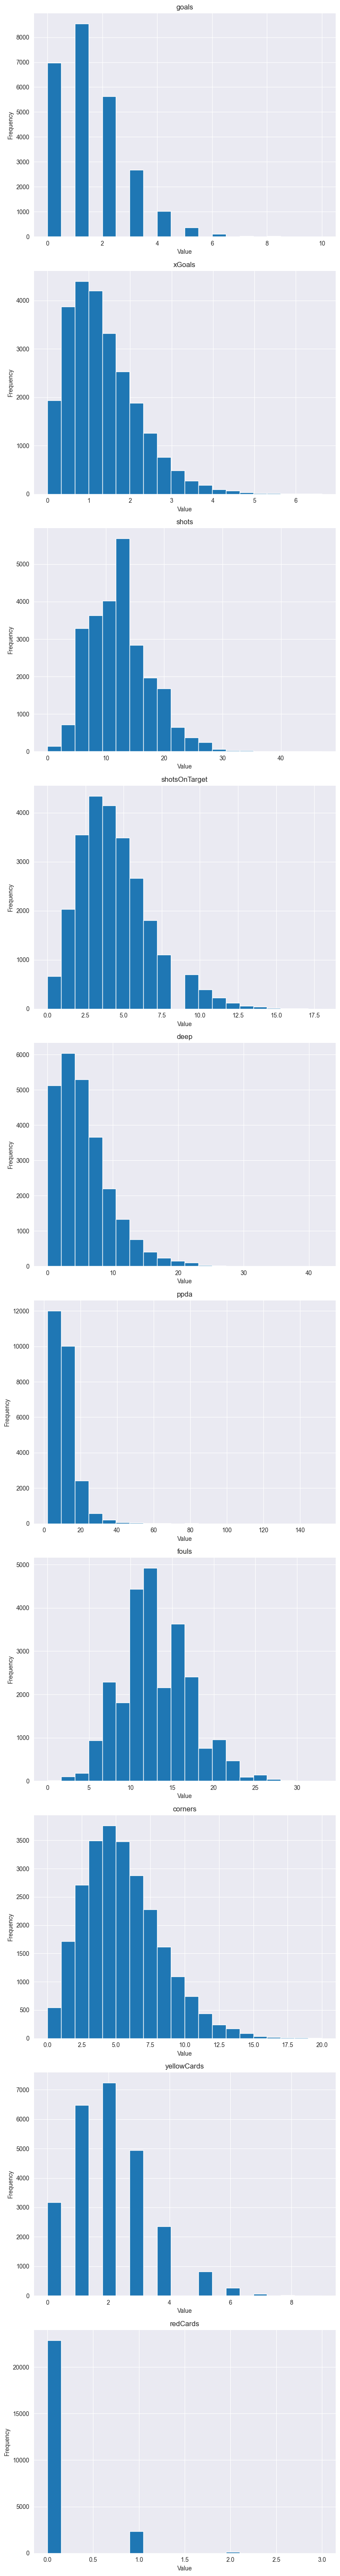

In [59]:
stats = ["goals", "xGoals", "shots", "shotsOnTarget", "deep", "ppda", "fouls", "corners", "yellowCards", "redCards"]
# Plot histograms for each statistic
fig, axes = plt.subplots(nrows=len(stats), ncols=1, figsize=(8, 6*len(stats)))

for i, stat in enumerate(stats):
    df_team_stats[stat].hist(ax=axes[i], bins=20)  # Adjust bins as needed
    axes[i].set_title(stat)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

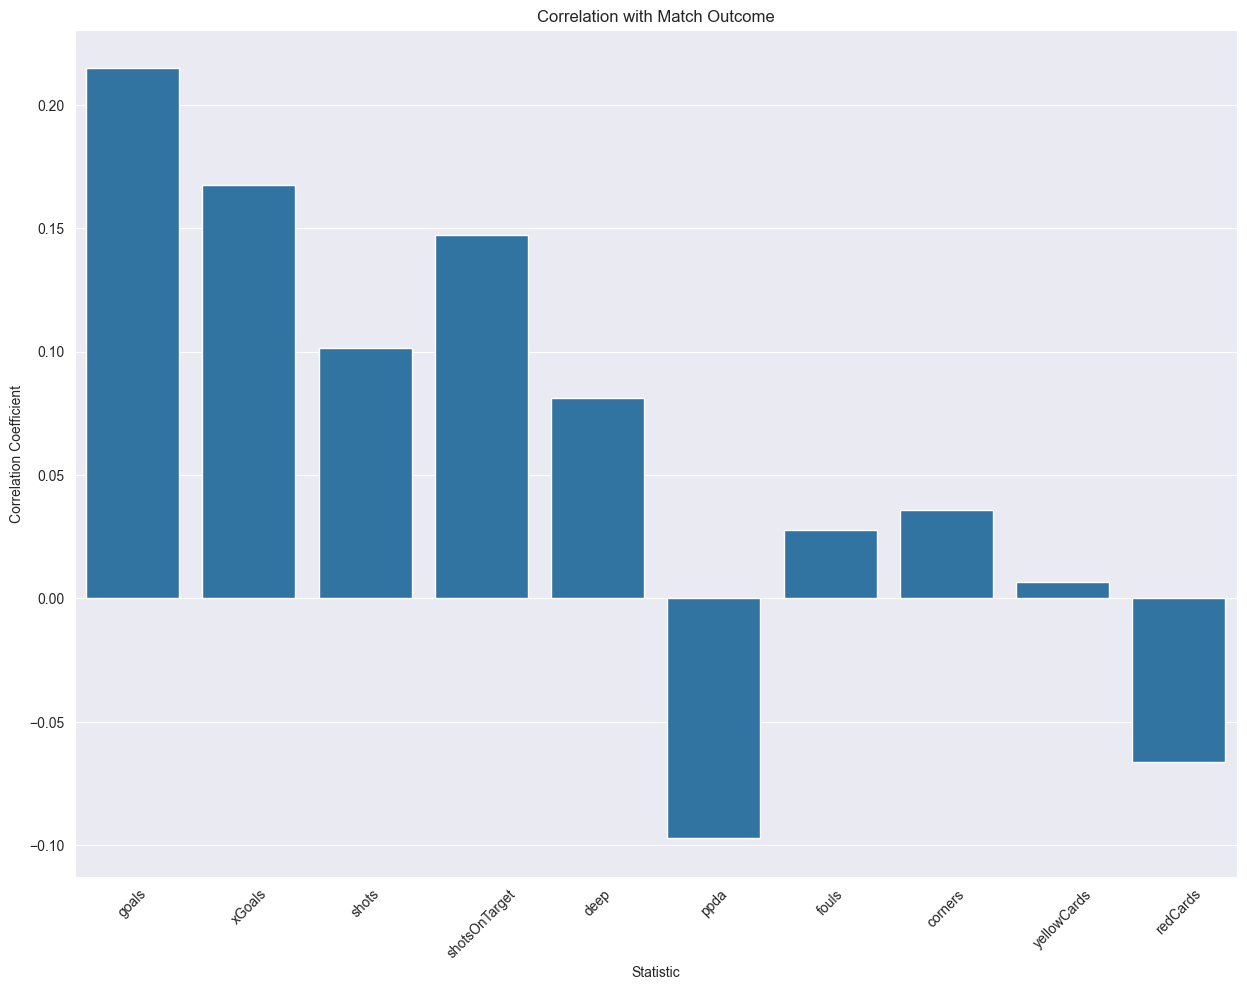

In [76]:
# Calculate the correlation coefficients between each statistic and the result
correlation_with_result = df_team_stats[stats].apply(lambda x: x.corr(df_team_stats['result']))

# Plot the correlation coefficients
plt.figure(figsize=(15, 11))
sns.barplot(x=correlation_with_result.index, y=correlation_with_result.values)
plt.title('Correlation with Match Outcome')
plt.xlabel('Statistic')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

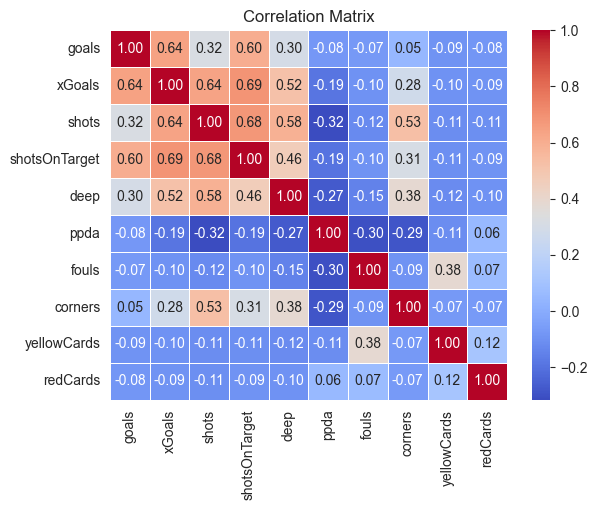

In [47]:
# Let's calculate the correlation of each statistics with each other
correlation = df_team_stats[stats].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

We can draw some pretty interesting conclusions from these two graphs. Some things are expected like the number of <b>goals</b> having a strong correlation with the outcome of a match. But we can also see some less obvious results, like the <b>yellow cards</b> having no real correlation with the outcome of a match. Or <b>ppda</b> (Passes allowed Per Defensive Action in the opposition half) having a correlation almost as strong as shots with the result. 

Now that we have determined which stats have a strong correlation with the outcome of a football match, let's see which teams perform/underperform in these fields.

In [69]:
df_team = pd.read_csv("data/raw/teams.csv")
df_team_stats_names = pd.merge(df_team_stats, df_team, on="teamID", how="inner")
df_team_stats_grouped = df_team_stats_names.groupby("name").agg({
    'goals': 'sum',
    'shots': 'sum',
    'fouls': 'sum',
    'xGoals': 'sum',
    'shotsOnTarget': 'sum',
    'ppda': 'mean',
    'yellowCards': 'sum',
    'redCards': 'sum'
})
df_team_stats_grouped

,goals,shots,fouls,xGoals,shotsOnTarget,ppda,yellowCards,redCards
name,,,,,,,,
AC Milan,410,3926,3643,404.006172,1337,10.129139,596.0,50
Alaves,190,1874,2824,198.614187,600,12.093852,529.0,25
Almeria,35,394,562,38.669944,119,8.761426,105.0,11
Amiens,99,982,1424,91.716095,301,11.715386,196.0,14
Angers,234,2605,2684,243.448559,873,15.606867,357.0,22
...,...,...,...,...,...,...,...,...
Werder Bremen,334,2938,3328,293.907393,1073,12.327063,477.0,16
West Bromwich Albion,181,1909,2108,186.749909,587,14.879778,330.0,11
West Ham,367,3247,2680,343.502599,1094,13.171824,438.0,19


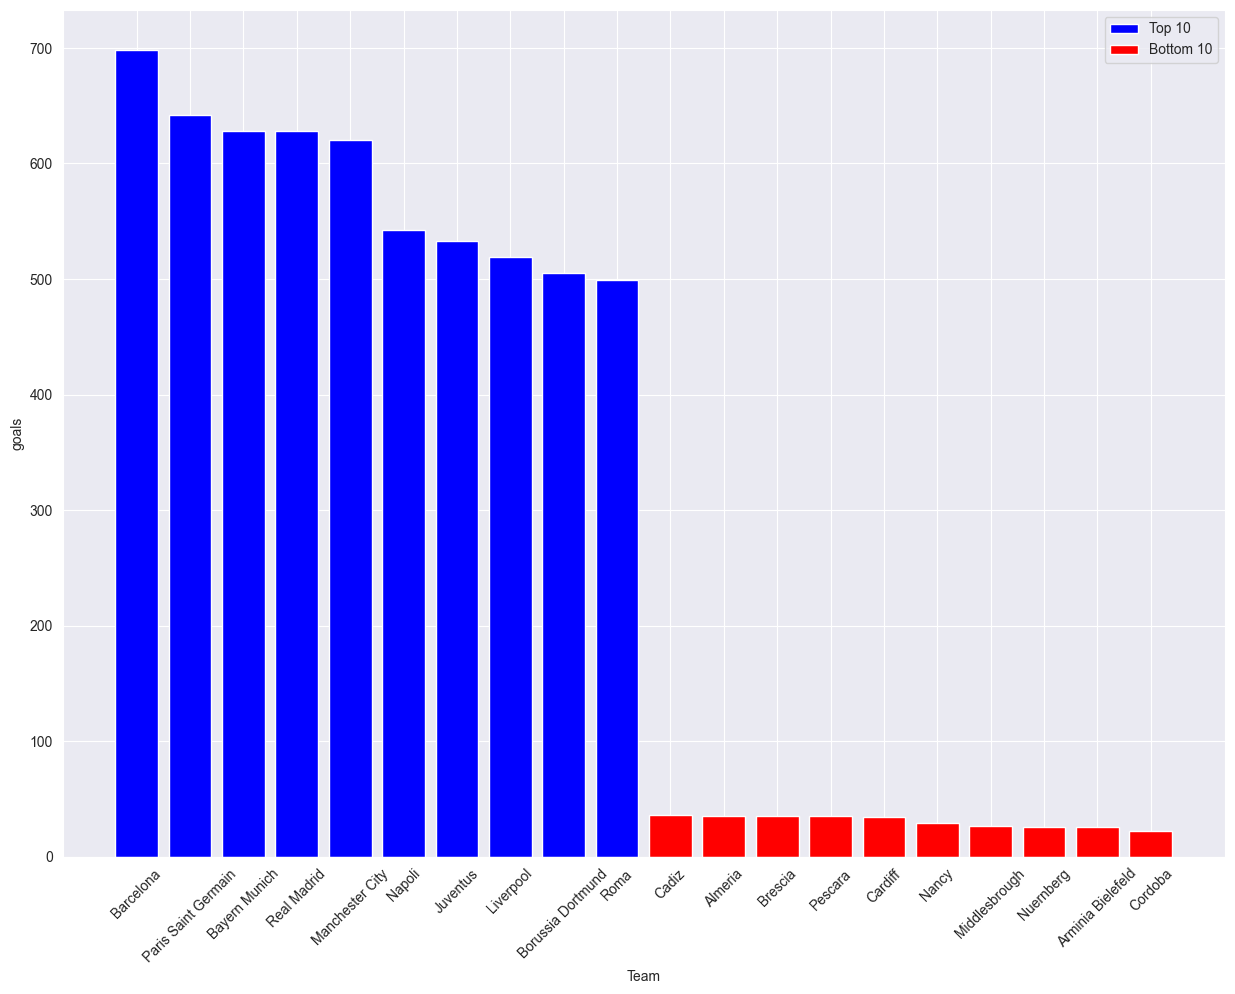

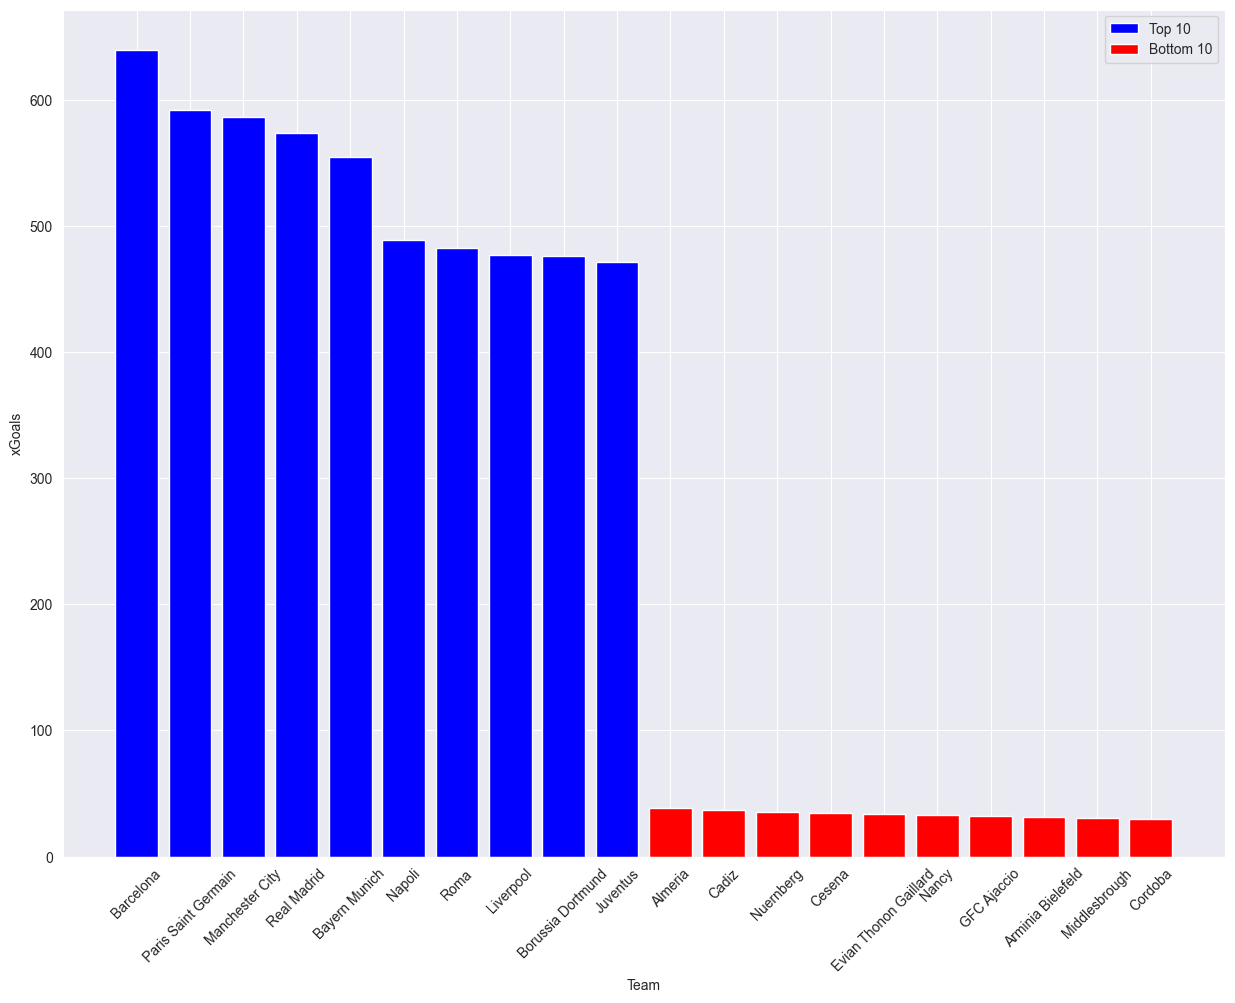

In [96]:
# Plot top 10 teams
def plot_stats(name_stat):
    group_df_sorted = df_team_stats_grouped.sort_values(by=name_stat, ascending=False)
    top_teams = group_df_sorted.head(10)
    bottom_teams = group_df_sorted.tail(10)
    plt.figure(figsize=(15, 11))
    plt.bar(top_teams.index, top_teams[name_stat], color='blue', label='Top 10')
    plt.bar(bottom_teams.index, bottom_teams[name_stat], color='red', label='Bottom 10')
    plt.xlabel('Team')
    plt.ylabel(name_stat)
    # plt.title('Total Goals Scored by Top and Bottom 10 Teams')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    

plot_stats('goals')
plot_stats('xGoals')

In [97]:
df_goals = df_shots[df_shots['shotResult'] == 'Goal']
df_goals

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
35,82,671,669.0,71,FromCorner,Cross,Head,Goal,0.374082,0.930,0.503
44,83,592,601.0,75,OpenPlay,Pass,RightFoot,Goal,0.019270,0.758,0.585
45,83,601,594.0,85,OpenPlay,Pass,RightFoot,Goal,0.069516,0.933,0.330
49,83,1016,NaN,13,OpenPlay,NaN,RightFoot,Goal,0.093540,0.887,0.460
56,83,573,574.0,82,OpenPlay,TakeOn,RightFoot,Goal,0.114176,0.842,0.497
...,...,...,...,...,...,...,...,...,...,...,...
324483,16133,3738,8981.0,24,OpenPlay,Cross,Head,Goal,0.579342,0.969,0.445
324488,16133,4773,NaN,50,OpenPlay,NaN,RightFoot,Goal,0.028437,0.773,0.662
324522,16134,4866,4670.0,38,OpenPlay,Chipped,RightFoot,Goal,0.071497,0.894,0.614
324530,16135,5769,NaN,17,OpenPlay,NaN,Head,Goal,0.220236,0.868,0.555
